In [3]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv('Bengaluru_House_Data.csv')
#dataframe named data is created.

In [5]:
data.shape
#i.e 13320 rows 9 columns

(13320, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
for col in data.columns:
    print(data[col].value_counts)
    print("\n")

<bound method IndexOpsMixin.value_counts of 0        Super built-up  Area
1                  Plot  Area
2              Built-up  Area
3        Super built-up  Area
4        Super built-up  Area
                 ...         
13315          Built-up  Area
13316    Super built-up  Area
13317          Built-up  Area
13318    Super built-up  Area
13319    Super built-up  Area
Name: area_type, Length: 13320, dtype: object>


<bound method IndexOpsMixin.value_counts of 0               19-Dec
1        Ready To Move
2        Ready To Move
3        Ready To Move
4        Ready To Move
             ...      
13315    Ready To Move
13316    Ready To Move
13317    Ready To Move
13318           18-Jun
13319    Ready To Move
Name: availability, Length: 13320, dtype: object>


<bound method IndexOpsMixin.value_counts of 0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
              

In [8]:
data.isna().sum()
#return nu of missing values

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
#since missing values are more in society and balcony therefore drop and area and ava no use
data.drop(columns=['area_type','availability','society','balcony'],inplace=True)
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [10]:
print(data.shape)
data.info()

(13320, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [11]:
#in location only one null
data['location'].value_counts()
#since max repetaion in whitefield therefore
data['location']=data['location'].fillna('Sarjarpur Road') 

In [12]:
#data['location'].value_counts()
data.isna().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
#in size 16 missing values
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [14]:
#2 bhk repeated most therefore filling 2 in null
data['size']=data['size'].fillna('2 BHK') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [15]:
data['BHK']=data['size'].str.split().str.get(0).astype(int)
#takes 2 from 2 bhk and converts it into int type and stores into new column named BHK
data.describe()

,bath,price,BHK
count,13247.000000,13320.000000,13320.000000
mean,2.692610,112.565627,2.802778
std,1.341458,148.971674,1.294496
min,1.000000,8.000000,1.000000
25%,2.000000,50.000000,2.000000
50%,2.000000,72.000000,3.000000
75%,3.000000,120.000000,3.000000
max,40.000000,3600.000000,43.000000


In [16]:
data[data.BHK>20]
#outliers in this column very high value of BHK

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
data['total_sqft'].unique()
#problem is that total_sqft is in single value also and range we have to convert it into all single values

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def single_val(x):
    t=x.split('-')
    if len(t)==2:
        return (float(t[0])+float(t[1]))/2
    try:
        return float(x)
    except:
        return None
    
data['total_sqft']=data['total_sqft'].apply(single_val)


In [20]:
#price/sqfeet
#column price in lakhs
#Price_per_sqfeet in ruppes
data['Price_per_sqfeet']=(data['price']*100000)/data['total_sqft']
data['Price_per_sqfeet']

0         369.981061
1         461.538462
2         430.555556
3         624.589086
4         425.000000
            ...     
13315     668.983493
13316    1111.111111
13317     525.854514
13318    1040.733632
13319     309.090909
Name: Price_per_sqfeet, Length: 13320, dtype: float64

In [21]:
data.describe()

,total_sqft,bath,price,BHK,Price_per_sqfeet
count,13274.000000,13247.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.692610,112.565627,2.802778,7.907501e+02
std,1238.405258,1.341458,148.971674,1.294496,1.064296e+04
min,1.000000,1.000000,8.000000,1.000000,2.678298e+01
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+02
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+02
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+02
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+06


In [22]:
data['location'].value_counts()
#more location are repeated  
#therefore reduced the data

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

In [23]:
data['location']=data['location'].apply(lambda x: x.strip())
loc=data['location'].value_counts()
loc

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1295, dtype: int64

In [24]:
loc_reduced=loc[loc<=10]
loc_reduced

BTM 1st Stage                         10
Nagadevanahalli                       10
Basapura                              10
Sector 1 HSR Layout                   10
Dairy Circle                          10
                                      ..
1Channasandra                          1
Hosahalli                              1
Vijayabank bank layout                 1
near Ramanashree California resort     1
Abshot Layout                          1
Name: location, Length: 1054, dtype: int64

In [25]:
def check(x):
    if x in loc_reduced:
        return 'Other'
    else:
        return x
data['location']=data['location'].apply(check)


In [26]:
print(data['location'].value_counts())
print(data.describe())

Other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64
         total_sqft          bath         price           BHK  \
count  13274.000000  13247.000000  13320.000000  13320.000000   
mean    1559.626694      2.692610    112.565627      2.802778   
std     1238.405258      1.341458    148.971674      1.294496   
min        1.000000      1.000000      8.000000      1.000000   
25%     1100.000000      2.000000     50.000000      2.000000   
50%     1276.000000      2.000000     72.000000      3.000000   
75%     1680.000000      3.000000    120.000000      3.000000   
max    52272.000000     40.000000   3600.000000     43.000000   

       Price_per_sqfeet  
count      1.327400e+04  
mean       7.907501e+02

In [27]:
data.describe()

,total_sqft,bath,price,BHK,Price_per_sqfeet
count,13274.000000,13247.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.692610,112.565627,2.802778,7.907501e+02
std,1238.405258,1.341458,148.971674,1.294496,1.064296e+04
min,1.000000,1.000000,8.000000,1.000000,2.678298e+01
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+02
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+02
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+02
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+06


In [28]:
#checking more wrong data
data=data[((data['total_sqft']/data['BHK'])>=300)]
data.describe()

,total_sqft,bath,price,BHK,Price_per_sqfeet
count,12530.000000,12457.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.562816,111.382401,2.650838,630.397936
std,1261.271296,1.080239,152.077329,0.976678,416.223798
min,300.000000,1.000000,8.440000,1.000000,26.782981
25%,1116.000000,2.000000,49.000000,2.000000,421.052632
50%,1300.000000,2.000000,70.000000,3.000000,529.411765
75%,1700.000000,3.000000,115.000000,3.000000,691.666667
max,52272.000000,16.000000,3600.000000,16.000000,17647.058824


In [29]:
print(data.shape)
data.Price_per_sqfeet.describe()
#max is very large therefore wrong

(12530, 7)


count    12530.000000
mean       630.397936
std        416.223798
min         26.782981
25%        421.052632
50%        529.411765
75%        691.666667
max      17647.058824
Name: Price_per_sqfeet, dtype: float64

In [30]:
def correct_data(df):
    df_final=pd.DataFrame()
    #group by gives keys on location and its sub-dataframe
    for k,subdf in df.groupby('location'):
        #mean of price/sqfeet for one location
        mean=np.mean(subdf.Price_per_sqfeet)
        
         #standard deviation of price/sqfeet for one location
        st=np.std(subdf.Price_per_sqfeet)
        
        temp_df=subdf[(subdf.Price_per_sqfeet> (mean-st)) & (subdf.Price_per_sqfeet<= (mean+st))]
        
        df_final=pd.concat([df_final,temp_df],ignore_index=True)
    return df_final
    
data=correct_data(data)

In [31]:
data.isna().sum()

location             0
size                 0
total_sqft           0
bath                56
price                0
BHK                  0
Price_per_sqfeet     0
dtype: int64

In [32]:
data['bath'].value_counts()
data['bath']=data['bath'].fillna(2.0)

In [33]:
data.isna().sum()

location            0
size                0
total_sqft          0
bath                0
price               0
BHK                 0
Price_per_sqfeet    0
dtype: int64

In [87]:
# te=data.groupby('BHK')
# te.first()
# te.get_group(2)

# #te.get_group('1st Phase JP Nagar')

,location,size,total_sqft,bath,price,BHK,Price_per_sqfeet
5,1st Phase JP Nagar,2 BHK,1394.0,2.0,100.0,2,7173.601148
6,1st Phase JP Nagar,2 BHK,1077.0,2.0,93.0,2,8635.097493
7,1st Phase JP Nagar,2 Bedroom,1566.0,2.0,180.0,2,11494.252874
11,1st Phase JP Nagar,2 BHK,1180.0,2.0,88.5,2,7500.000000
12,1st Phase JP Nagar,2 BHK,1200.0,2.0,86.0,2,7166.666667
13,1st Phase JP Nagar,2 BHK,1394.0,2.0,85.0,2,6097.560976
15,1st Phase JP Nagar,2 BHK,1205.0,2.0,85.0,2,7053.941909
17,1st Phase JP Nagar,2 BHK,900.0,2.0,75.0,2,8333.333333


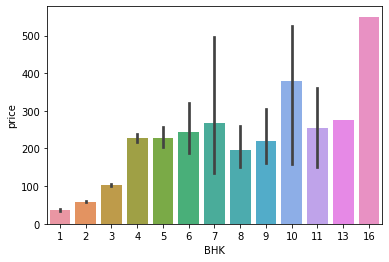

In [34]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.barplot(x=data['BHK'],y=data['price'])
plt.show()
# fg=sb.countplot(data['BHK'])
# for p in fg.patches:
#     fg.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.50, p.get_height()+0.01))

# fg.set_xlabel("BHK")
# fg.set_ylabel("FREQUENCY")

<AxesSubplot:>

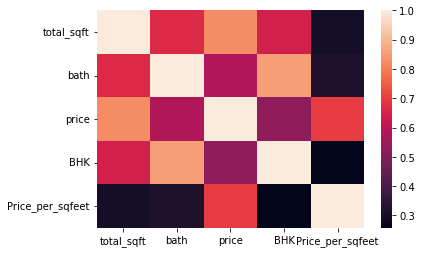

In [35]:
sb.heatmap(data.corr())
#more light color strong correlation

In [36]:
#wrong data in bhk columns
def bhk_cd(df):
    rem_ind=np.array([])
    for l,l_subdf in df.groupby('location'):
        BHK_data={}
        for  b,b_subdf in l_subdf.groupby('BHK'):
            BHK_data[b]={'mean': np.mean(b_subdf.Price_per_sqfeet),
                         'std': np.std(b_subdf.Price_per_sqfeet),
                         'freq': b_subdf.shape[0]
                        }
        for  b,b_subdf in l_subdf.groupby('BHK'):
            Data=BHK_data.get(b-1)
            if Data and Data['freq']>5:
                rem_ind=np.append(rem_ind,b_subdf[b_subdf.Price_per_sqfeet<(Data['mean'])].index.values)
    return df.drop(rem_ind,axis='index')



In [37]:
data=bhk_cd(data)

In [38]:
data.shape

(7361, 7)

In [39]:
#cleaned data
#Price_per_sqfeet was added to check the wrong data now size and Price_per_sqfeet will be removed
data.drop(columns=['size','Price_per_sqfeet'],inplace=True)

In [40]:
data

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10290,Yeshwanthpur,1195.0,2.0,100.0,2
10291,Yeshwanthpur,1692.0,3.0,108.0,3
10293,Yeshwanthpur,2500.0,5.0,185.0,6
10298,Yeshwanthpur,1855.0,3.0,135.0,3


In [41]:
data.head()
#Taget column is price!!!

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


D:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

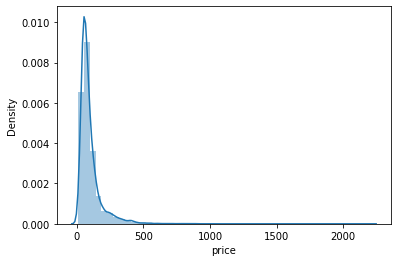

In [55]:
#sb.distplot(np.log(data['price']))
sb.distplot(data['price'])
#price is screwed therefore log used

In [56]:
data.to_csv('Final_data.csv')

In [57]:
X=data.drop(columns=['price'])
y=np.log(data['price'])

In [58]:
X

,location,total_sqft,bath,BHK
0,1st Block Jayanagar,2850.0,4.0,4
1,1st Block Jayanagar,1630.0,3.0,3
2,1st Block Jayanagar,1875.0,2.0,3
3,1st Block Jayanagar,1200.0,2.0,3
4,1st Block Jayanagar,1235.0,2.0,2
...,...,...,...,...
10290,Yeshwanthpur,1195.0,2.0,2
10291,Yeshwanthpur,1692.0,3.0,3
10293,Yeshwanthpur,2500.0,5.0,6
10298,Yeshwanthpur,1855.0,3.0,3


In [59]:
y

0        6.059123
1        5.267858
2        5.459586
3        4.867534
4        4.997212
           ...   
10290    4.605170
10291    4.682131
10293    5.220356
10298    4.905275
10299    5.075174
Name: price, Length: 7361, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)


(5888, 4)
(1473, 4)


In [62]:
data.head(1)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4


# Linear Regression 

In [63]:
# #Handling Categorical Data

# col_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')
s1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0])],remainder='passthrough')
s2=LinearRegression()
pipe=Pipeline([('step1',s1),('step2',s2)])
pipe.fit(X_train,y_train)
yp=pipe.predict(X_test)
r2_score(y_test,yp)

0.8287364396137519

In [72]:
# lr=LinearRegression(normalize=True)
# scl=StandardScaler()

In [73]:
# pipe=make_pipeline(col_trans,scl,lr)

In [74]:
# #first data goeas into column transformer 
# #in column transformer it goes first into OneHotEncoder
# #then data is scale and the data is fit in linear Regression 
# pipe.fit(X_train,y_train)

In [75]:
# y_pred=pipe.predict(X_test)
# r2_score(y_test,y_pred)

#  Ridge

In [76]:
# rid=Ridge()

In [77]:
# pr=make_pipeline(col_trans,scl,rid)

In [78]:
# pr.fit(X_train,y_train)

In [64]:
# y_pred_rid=pr.predict(X_test)
# r2_score(y_test,y_pred_rid)

s1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0])],remainder='passthrough')
s2=Ridge(alpha=10)
pipe=Pipeline([('step1',s1),('step2',s2)])
pipe.fit(X_train,y_train)
ypr=pipe.predict(X_test)
r2_score(y_test,ypr)

0.805241277247892

In [65]:
data

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10290,Yeshwanthpur,1195.0,2.0,100.0,2
10291,Yeshwanthpur,1692.0,3.0,108.0,3
10293,Yeshwanthpur,2500.0,5.0,185.0,6
10298,Yeshwanthpur,1855.0,3.0,135.0,3


In [66]:
#Taking Ridge
import pickle
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(pipe,open('Ridge.pkl','wb'))

In [1]:
from num2words import num2words
  
# Most common usage.
print(num2words(36))
  
# Other variants, according to the type of article.
print(num2words(36, to = 'ordinal'))

thirty-six
thirty-sixth
